In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iri=load_iris()

In [4]:
df=pd.DataFrame(iri.data)

In [5]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.columns=iri.feature_names

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iri.target

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
target               0.000000
dtype: float64

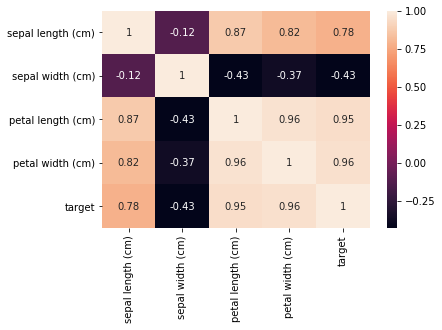

In [13]:
# fig=plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [14]:
x=df.drop('target',axis=1)
y=df.target

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
x_train1=sc.fit_transform(x_train)
x_test1=sc.transform(x_test)

In [20]:
x_train_sc=pd.DataFrame(x_train1,columns=iri.feature_names)
x_test_sc=pd.DataFrame(x_test,columns=iri.feature_names)

In [21]:
from sklearn.feature_selection import RFE

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lgr=LogisticRegression()

In [24]:
rfe=RFE(lgr,3)
rfe=rfe.fit(x_train_sc,y_train)

In [25]:
x_train_sc_rfe=x_train_sc[x_train_sc.columns[rfe.support_]]

In [26]:
x_train_sc_rfe.head()

,sepal width (cm),petal length (cm),petal width (cm)
0,-1.462003,-0.099511,-0.323398
1,-0.502563,0.717703,0.353032
2,0.217016,0.951192,0.758890
3,-0.022844,0.309096,0.217746
4,1.416315,1.301427,1.705891


In [27]:
x_train_sc_rfe.shape

(105, 3)

In [28]:
import statsmodels.api as sm

In [29]:
x_train_sc_rfe_sm=sm.add_constant(x_train_sc_rfe)

In [30]:
col=x_train_sc_rfe_sm.columns

In [31]:
x_train_sc_rfe_sm.head()

,const,sepal width (cm),petal length (cm),petal width (cm)
0,1.0,-1.462003,-0.099511,-0.323398
1,1.0,-0.502563,0.717703,0.353032
2,1.0,0.217016,0.951192,0.758890
3,1.0,-0.022844,0.309096,0.217746
4,1.0,1.416315,1.301427,1.705891


In [32]:
logm=sm.GLM(list(y_train),x_train_sc_rfe_sm,family=sm.families.Poisson()).fit()

In [33]:
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:                            GLM   Df Residuals:                      101
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91.406
Date:                Mon, 16 Sep 2019   Deviance:                       12.106
Time:                        12:52:45   Pearson chi2:                     9.43
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5309      0.175     -3.031      0.002      -0.874      -0.188
sepal width (cm)     -0.3727      0.134     -2.774      0.006      -0.636      -0.109
petal length (cm)     0.6135      0.287      2.141      0.032       0.052       1.175
petal width (cm)      0.5544      0.272      2.038      0.042       0.021       1.087
=====================================================================================
"""

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train_sc_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(x_train_sc_rfe_sm.values,i) for i in range(x_train_sc_rfe_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,petal length (cm),13.28
3,petal width (cm),12.67
1,sepal width (cm),1.18
0,const,1.00


In [35]:
col=col.drop('petal length (cm)')

In [36]:
x_train_sc_rfe_sm=x_train_sc_rfe_sm[col]

In [37]:
logm2=sm.GLM(list(y_train),x_train_sc_rfe_sm,family=sm.families.Poisson()).fit()

In [38]:
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:                            GLM   Df Residuals:                      102
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93.625
Date:                Mon, 16 Sep 2019   Deviance:                       16.543
Time:                        12:52:46   Pearson chi2:                     13.4
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4493      0.159     -2.828      0.005      -0.761      -0.138
sepal width (cm)    -0.3971      0.129     -3.079      0.002      -0.650      -0.144
petal width (cm)     1.0165      0.151      6.734      0.000       0.721       1.312
====================================================================================
"""

In [39]:
vif=pd.DataFrame()
vif['Features']=x_train_sc_rfe_sm.columns
vif['VIF']=[variance_inflation_factor(x_train_sc_rfe_sm.values,i) for i in range(x_train_sc_rfe_sm.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,sepal width (cm),1.08
2,petal width (cm),1.08
0,const,1.00


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
lgr.fit(x_train_sc_rfe,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred_lgr_train=logm2.predict(x_train_sc_rfe_sm)

In [43]:
accuracy_score(y_train,y_pred_lgr_train.round())

0.8571428571428571

In [44]:
confusion_matrix(y_train,y_pred_lgr_train.round())

array([[31,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0],
       [ 0,  9, 22,  5,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)

In [45]:
print(classification_report(y_train,y_pred_lgr_train.round()))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       0.80      1.00      0.89        37
         2.0       1.00      0.59      0.75        37
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.86       105
   macro avg       0.56      0.52      0.53       105
weighted avg       0.93      0.86      0.87       105



In [46]:
y_pred_sm_test=sm.add_constant(x_test_sc)

In [47]:
x_test_sc_sm=y_pred_sm_test[x_train_sc_rfe_sm.columns]

In [48]:
x_test_sc_sm.head()

,const,sepal width (cm),petal width (cm)
73,1.0,2.8,1.2
18,1.0,3.8,0.3
118,1.0,2.6,2.3
78,1.0,2.9,1.5
76,1.0,2.8,1.4


In [49]:
y_pred_sm_test=logm2.predict(x_test_sc_sm)

In [50]:
accuracy_score(y_test,y_pred_sm_test.round())

0.9111111111111111

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_sc,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
pred=knn.predict(x_train_sc)

In [53]:
accuracy_score(y_train,pred)*100

95.23809523809523

In [54]:
x_test_sc_sm.drop('const',axis=1,inplace=True)

In [55]:
l=[]
k=[]
m=[]
for i in range(3,11,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_sc,y_train)
    pred=knn.predict(x_train_sc)
    l.append(accuracy_score(y_train,pred))
    pred2=knn.predict(x_test_sc)
    m.append(pred2)
    k.append(i)
    

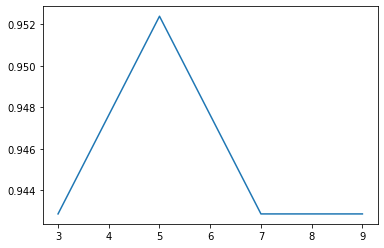

In [56]:
plt.plot(k,l)

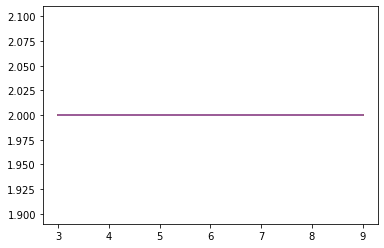

In [57]:
plt.plot(k,m)
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [59]:
ridge=Ridge()
lasso=Lasso()

In [88]:
dic1={'alpha':[3,5,7,9]}
dic2={'alpha':list(range(-11,11,2))}
r=GridSearchCV(ridge,dic1,cv=5)
la=GridSearchCV(lasso,dic2,cv=5)

In [89]:
r.fit(x_train,y_train)
la.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [-11, -9, -7, -5, -3, -1, 1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [90]:
print(r.best_params_)
print(la.best_params_)

{'alpha': 3}
{'alpha': 1}


In [91]:
print(r.best_score_)
print(la.best_score_)

0.909955604233358
0.3315630679503234


In [97]:
dic3={'n_neighbors':k}
kn=GridSearchCV(knn,dic3,cv=5)

In [100]:
kn.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=9, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
print(kn.best_params_)
print(kn.best_score_)

{'n_neighbors': 7}
0.9523809523809523
